In [95]:
# import necessary lib
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

data generation

In [96]:
# data Generate X,Y
def generateDatset(m):
    m=100 #total number of samples
    X=np.random.randn(m)*10
    noise=np.random.randn(m)
    #print(X.mean(),X.std())
    y=3*X+1+5*noise
    return X,y
# plt.scatter(X,Y)
# plt.show()

In [97]:
Y.shape

(100,)

In [98]:
X.shape

(100,)

In [99]:
X,y=generateDatset(100)
print(X.shape,Y.shape)

(100,) (100,)


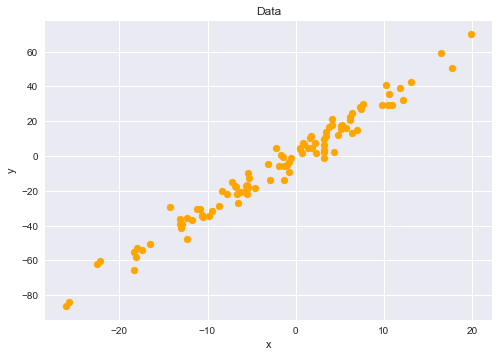

In [100]:
def plotData(X,y,color="orange",title="Data"):
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(X,y,c=color)
    plt.show()

plotData(X,y)
    


Data Normalisation

In [101]:
print(X.mean())

-2.2905917908904945


In [102]:
print(X.std())

9.60310309350893


In [103]:
def normaliseData(X):
    X=(X-X.mean())/X.std()
    return X

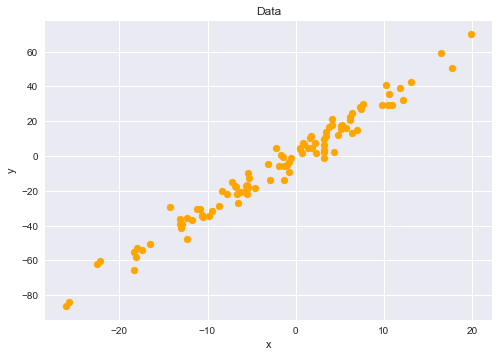

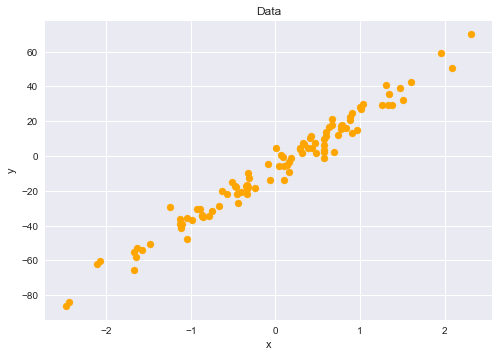

In [104]:
plotData(X,y)
X=normaliseData(X)
plotData(X,y)

Train Test and Spilt

In [105]:
def trainTestSpilt(X,y,spilt=0.8):
    m=X.shape[0]
    data=np.zeros((m,2))
    data[:,0]=X
    data[:,1]=y
    np.random.shuffle(data)
    spilt=int(m*spilt)
    XT=data[:spilt,0]
    yT=data[:spilt,1]
    
    Xt=data[spilt: ,0]
    yt=data[spilt:, 1]
    return XT,yT,Xt,yt
    

In [106]:
XT,yT,Xt,yt=trainTestSpilt(X,y)

In [107]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


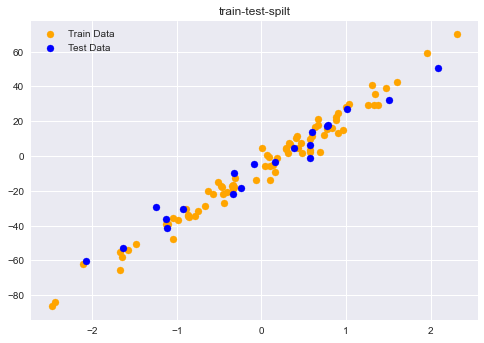

In [108]:
plt.scatter(XT,yT,color="orange",label="Train Data")
plt.scatter(Xt,yt,color="blue",label="Test Data")
plt.title("train-test-spilt")
plt.legend()
plt.show()

Modeling

In [109]:
# Modelling 
def hypothesis(X,theta):
    return theta[0] + theta[1]*X 

def error(X,y,theta):
    m = X.shape[0]
    e = 0 
    for i in range(m):
        y_i = hypothesis(X[i],theta)
        e = e + (y[i] - y_i)**2 
    
    return e/(2*m)

def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        exp = hypothesis(X[i],theta) - y[i]
        grad[0] += (exp) 
        grad[1] += (exp)*X[i]

    return grad/m 


def train(X,y,learning_rate = 0.1,maxItrs = 100):
    theta = np.zeros((2,))
    error_list = []
    
    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
    plt.xlabel("Iteration Number")
    plt.ylabel("Loss")
    plt.plot(error_list)
    return theta

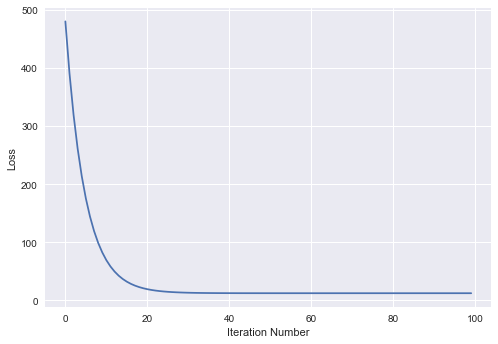

In [110]:
theta = train(X,y)

In [111]:
theta

array([-6.58119064, 29.86593427])

In [112]:
def predict(X,theta):
    return hypothesis(X,theta)

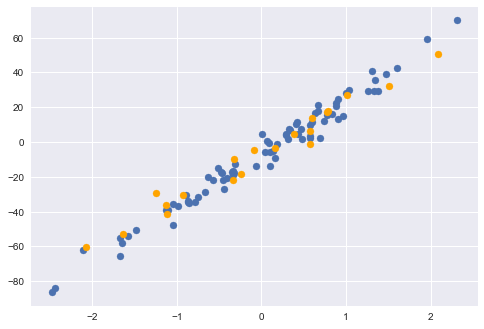

In [113]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color='orange')
plt.show()

In [114]:
yp = predict(Xt,theta)
     

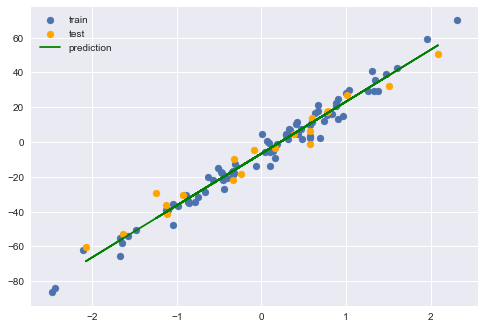

In [115]:
plt.scatter(XT,yT,label="train")
plt.scatter(Xt,yt,color='orange',label="test")
plt.plot(Xt,yp,color='green',label="prediction")
plt.legend()
plt.show()

In [116]:
# Model Evaluation
def r2Score(y,yp):
    ymean = y.mean()
    num = np.sum((y-yp)**2)
    denom = np.sum((y - ymean)**2)
    return 1 - num/denom 

r2Score(yt,yp)
     

0.9595124657737512

C:\Users\Shreya\AppData\Local\Temp\ipykernel_18152\225640697.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


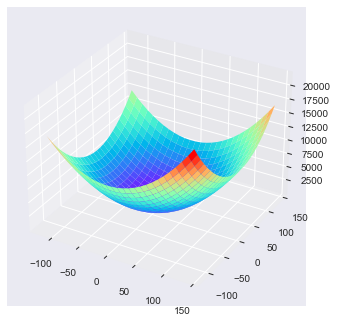

C:\Users\Shreya\AppData\Local\Temp\ipykernel_18152\225640697.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


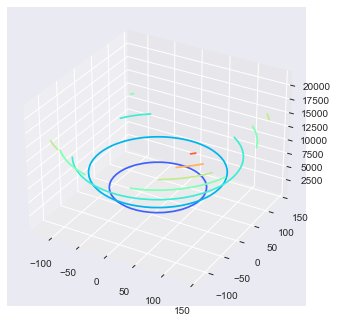

In [117]:
# Visualising the training process 
T0 = np.arange(-120,150,10)
T1 = np.arange(-120,150,10)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i,j]*X + T0[i,j]
        J[i,j] = np.mean((y-yp)**2)/2


fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

In [118]:
# Trace the trajectory of gradient 
def train(X,y,learning_rate = 0.1,maxItrs = 100):
    theta = np.array([-150,100])
    error_list = []
    # note down values of theta
    theta_list = []
    
    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    return theta, theta_list, error_list

In [119]:
theta, theta_list, error_list = train(XT,yT)
     

In [120]:
theta_list = np.array(theta_list)

C:\Users\Shreya\AppData\Local\Temp\ipykernel_18152\1081706445.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


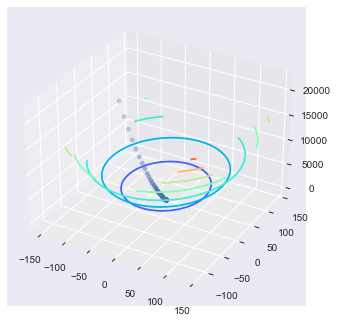

In [121]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1],error_list)
plt.show()

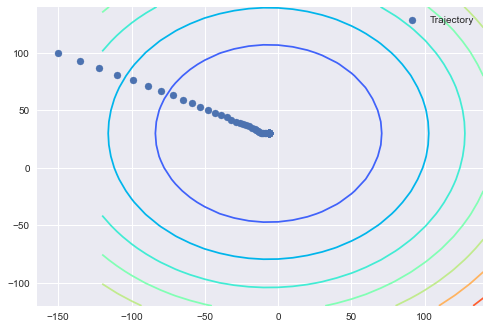

In [122]:
# 2D Contour Plot (Top View)
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],label='Trajectory')
plt.legend()
plt.show()